In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

sys.path.append(project_root)

In [2]:
import matplotlib.pyplot as plt

import torch
import torch.optim as optim

from src.models.cgcnn import CGCNN
from src.data.loader import get_loaders
from src.train.trainer import Trainer

In [3]:
train_loader, val_loader, test_loader = get_loaders("../data/processed",
                                                    target="formation_energy_per_atom",
                                                    batch_size=16,
                                                    num_workers=0,
                                                    train_ratio=0.8,
                                                    val_ratio=0.1,
                                                    seed=42)

model = CGCNN(
    node_fea_len=118,
    edge_fea_len=1,
    hidden_fea_len=16,
    n_conv=5,
    out_dim=1
)

optimizer = optim.Adam(model.parameters(), lr=1e-5)

trainer = Trainer(
    model,
    train_loader,
    val_loader,
    optimizer,
    device="cuda" if torch.cuda.is_available() else "cpu"
)

In [4]:
best_model, train_losses, val_maes = trainer.train(num_epochs=500, max_prints=20)

[Epoch 1] Train Loss: 0.7469 | Val MAE: 0.7138


[Epoch 25] Train Loss: 0.3945 | Val MAE: 0.3959


[Epoch 50] Train Loss: 0.2959 | Val MAE: 0.2963


[Epoch 75] Train Loss: 0.2518 | Val MAE: 0.2564


[Epoch 100] Train Loss: 0.2215 | Val MAE: 0.2273


[Epoch 125] Train Loss: 0.2012 | Val MAE: 0.2027


[Epoch 150] Train Loss: 0.1868 | Val MAE: 0.1884


[Epoch 175] Train Loss: 0.1766 | Val MAE: 0.1768


[Epoch 200] Train Loss: 0.1692 | Val MAE: 0.1694


[Epoch 225] Train Loss: 0.1640 | Val MAE: 0.1644


[Epoch 250] Train Loss: 0.1602 | Val MAE: 0.1599


[Epoch 275] Train Loss: 0.1570 | Val MAE: 0.1583


[Epoch 300] Train Loss: 0.1542 | Val MAE: 0.1547


[Epoch 325] Train Loss: 0.1519 | Val MAE: 0.1523


[Epoch 350] Train Loss: 0.1503 | Val MAE: 0.1505


[Epoch 375] Train Loss: 0.1481 | Val MAE: 0.1482


[Epoch 400] Train Loss: 0.1462 | Val MAE: 0.1468


[Epoch 425] Train Loss: 0.1448 | Val MAE: 0.1456


[Epoch 450] Train Loss: 0.1431 | Val MAE: 0.1433


[Epoch 475] Train Loss: 0.1418 | Val MAE: 0.1425


[Epoch 500] Train Loss: 0.1405 | Val MAE: 0.1414
Best Validation MAE: 0.1397


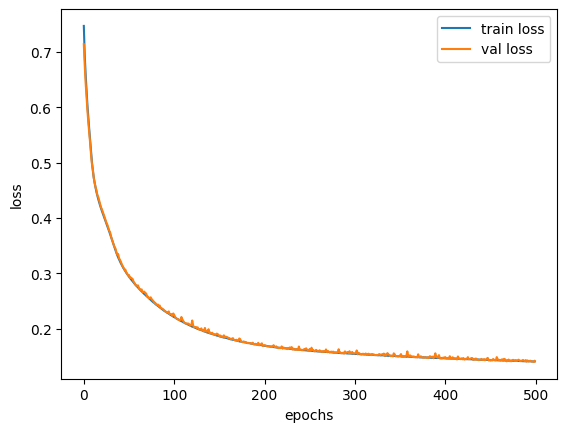

In [5]:
plt.figure()
plt.plot(train_losses, label="train loss")
plt.plot(val_maes, label='val loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [6]:
model.load_state_dict(best_model)
trainer.test(test_loader, metric="mae")
trainer.test(test_loader, metric="rmse")

Test mae: 0.1437


Test rmse: 0.2261


0.2260587364435196